<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada</h1>
<h2>Backtracking</h2>
</center>
</div>

In [78]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<img src="img/backscheme.png" width='40%'/>

# Problema 1: Cartes

Considerem un conjunt de parelles de cartes del mateix número fins a un valor donat, $N$. Per a $N=3$ tindríem les cartes: $1,1,2,2,3,3$.<br>
Volem trobar una ordenació d'aquest conjunt de cartes de forma que, entre dos cartes d'un mateix valor $n=1,...,N$ hi hagi exactament $n$ cartes. 

Per a $N=3$ una solució seria:
        $$3-1-2-1-3-2$$
        
Observeu que entre les cartes de valor $1$ hi ha una sola carta, entre les de valor $2$, dues cartes i el mateix per a les cartes de valor $3$.<br>
Implementeu el problema de les cartes on, donat un enter, $N$, mostri, si existeix, la solució al problema.<br>
- <b>Pista1:</b> Comenceu posant els números més grans ja que són els més problemàtics.</p>
- <b>Pista2:</b> Donada una llista, per exemple: <b>mylist=[3,2,0,0,0]</b> la funció <b>mylist.index(0)</b> retorna $2$ que és la posició del primer zero que apareix.

In [79]:
def solve_deck(N):
    """
    Aquesta funció soluciona el problema de les cartes
    
    Params
    ======
    :N: El número de la parella de cartes de major valor
    
    Returns 
    =======
    :_str: Un string mostrant el resultat en cas que existeixi o un missatge d'error en cas que no.
    """
   
    # Inicialitzem un vector on escriurem la solució de mida 2N
    # Inicialment no tenim cap número visitat
    solution = solve_deck_backtracking(N, [0]*(2*N), set([]))
    
    if not solution:
        return f"N={N:<2}: No s'ha trobat solució"
    return f"N={N:<2}: {solution}"


def solve_deck_backtracking(N, solution, placed_nums):
    """
    Aquesta funció implementa l'estratègia de backtracking per al problema de les cartes

    Params
    ======
    :N: El número de la parella de cartes de major valor
    :solution: Una llista amb la solució temporal 
    :placed_nums: Un conjunt dels nombres que ja hem col·locat

    Returns
    =======
    :_str: Un string mostrant el resultat, en cas que existeixi o un 'error' en cas que no.
           Internament retornarem un booleà per aturar la recursió.
    """
    # Cas base. Solucio no te més zeros, s'han colocat totes les cartes al vector inicial de tot 0's!
    if 0 not in solution:
        return True

    # Provem de posar el següent número
    for n in range(N,0,-1):
        
        # Filtrem els números que ja hem col·locat prèviament
        if n not in placed_nums:

            # Busquem el primer índex lliure (el primer 0) on poder posar un valor a la llista de solution
            idx1 = solution.index(0)
            # El segon índex (ha d'haver-hi n cartes enmig)
            idx2 = idx1 + n + 1

            # Cal comprovar que el segon index existeixi i estigui buit!
            if idx2 < 2*N and solution[idx2]==0:

                # si es possible, els coloquem
                placed_nums.add(n)
                solution[idx1], solution[idx2] = n, n

                # Cridem recursivament mentre tot estigui correcte
                ok = solve_deck_backtracking(N, solution, placed_nums)

                if ok:
                    # Tot perfecte, acabem
                    return solution

                # No ha funcionat, desfem el moviment
                placed_nums.remove(n)
                solution[idx1], solution[idx2] = 0, 0

    # No hi ha cap més número que poguem posar, no hi ha solució
    return False 

In [80]:
print(solve_deck(3))

N=3 : [3, 1, 2, 1, 3, 2]


In [81]:
for N in range(1,13):
    print(solve_deck(N))

N=1 : No s'ha trobat solució
N=2 : No s'ha trobat solució
N=3 : [3, 1, 2, 1, 3, 2]
N=4 : [4, 1, 3, 1, 2, 4, 3, 2]
N=5 : No s'ha trobat solució
N=6 : No s'ha trobat solució
N=7 : [7, 4, 1, 5, 1, 6, 4, 3, 7, 5, 2, 3, 6, 2]
N=8 : [8, 6, 4, 2, 7, 5, 2, 4, 6, 8, 3, 5, 7, 1, 3, 1]
N=9 : No s'ha trobat solució
N=10: No s'ha trobat solució
N=11: [11, 9, 7, 5, 10, 2, 6, 8, 2, 5, 7, 9, 11, 6, 4, 10, 8, 3, 1, 4, 1, 3]
N=12: [12, 10, 11, 6, 4, 5, 9, 7, 8, 4, 6, 5, 10, 12, 11, 7, 9, 8, 3, 1, 2, 1, 3, 2]


# Problema 2: N-Queens

Implementeu el problema de les reines. Donat un tauler de tamany $N\times N$ i $N$ reines del joc dels escacs, l'objectiu és col·locar-les totes, si és possible, sense que s'ataquin entre si. Recordeu que dues reines s'ataquen entre si si estan situades a la mateixa fila, a la mateixa columna o a la mateixa diagonal.<br>

- <b>Pista:</b> Podeu aplicar l'estratègia de col·locar una reina per columna, començant a la columna 0. Si seguiu aquesta estratègia podeu utilitzar la funció <b>check_position_previous_columns</b> per a comprovar si una posició és segura.

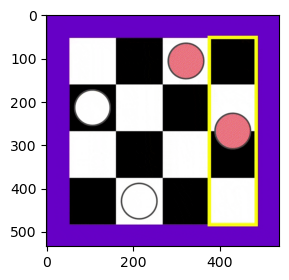

In [83]:
from matplotlib import pyplot as plt
im = plt.imread('img/nqueens.png')
fig, ax = plt.subplots(figsize=(6, 3))
ax.imshow(im)
plt.show()

In [82]:
def format_board(board):
    """
    Aquesta funció retorna una visualització per al problema de les N-Reines
    """
    _str = "+"
    for i in board[0]:
        _str += "---+"
    _str += "\n"
    for i in board:
        _str += "|"
        for j in i:
            _str += "   |" if j == 0 else " Q |"
        _str +="\n+"
        for j in i:
            _str += "---+"
        _str +="\n"
    return _str


def check_position_previous_columns(board, row, col):
    """
    Aquesta funció comprova si es pot posar una reina a la posició (row, col) en l'estratègia d'anar
    posant reines per columnes. 
     !!! Només comprova les columnes anteriors a la que estem col·locant la reina. !!!
    """
    # Comprovem les columnes anteriors de la fila 'row'
    for i in range(col):
        if board[row][i] == 1:
            return False
    # Comprovem la diagonal inferior
    for i, j in zip(range(row, -1, -1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False
    # Comprovem la diagonal superior
    for i, j in zip(range(row, len(board), 1), range(col, -1, -1)):
        if board[i][j] == 1:
            return False

    return True
  
def solve_queens(N):
    """
    Aquesta funció soluciona el problema de les N-Reines.
    
    Params
    ======
    :N: Un enter amb la mida del tauler, NxN i el nombre de reines que hi col·locarem
    
    Returns
    =======
    :_str: El tauler en format string amb les reines col·locades en cas que existeixi una solució o un missatge d'error
           en cas que no sigui possible.
    """    
    board = [[0]*N for _ in range(N)] # Taulell de 0's en la posicio a colocar la reina posem un 1    
    solution = solve_queens_backtracking(N, board, 0)
    
    if not solution:
        return f'N={N}: No té solució'
    
    return f'N={N}:\n{format_board(solution)}'

def solve_queens_backtracking(N, board, col):
    """
    Aquesta funció implementa l'estratègia de backtracking per al problema de les reines

    Params
    ======
    :N: El número de reines que estem considerant
    :board: Llista de llistes amb la graella de posicions 
    :col: Columna on volem posar la propera reina

    Returns
    =======
    :b: La graella 'board' mostrant el resultat, en cas que existeixi o un 'error' en cas que no.
        Internament retornarem un booleà per aturar la recursió.
    """
    # Les columnes van indexades de 0,...,N-1.
    if col==N:
        return True

    # Provem totes les files.
    for row in range(N):
        # Si satisfà la restriccio en quan a les anteriord la coloquem
        if check_position_previous_columns(board, row, col):
            
            board[row][col] = 1
            # Cridem recursivament
            ok = solve_queens_backtracking(N, board, col+1)
            # Si ok es True es que ha arribat al final
            if ok:
                return board
            # Si no, traiem la reina del lloc on es troba
            board[row][col] = 0
    #surt del bucle, cap reina en aquella columna es possible
    return False

In [7]:
print(solve_queens(2))
print(solve_queens(4))
print(solve_queens(17))

N=2: No té solució
N=4:
+---+---+---+---+
|   |   | Q |   |
+---+---+---+---+
| Q |   |   |   |
+---+---+---+---+
|   |   |   | Q |
+---+---+---+---+
|   | Q |   |   |
+---+---+---+---+

N=17:
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| Q |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   | Q |   |   |   |   |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|   | Q |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |   |   |   | Q |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|   |   | Q |   |   |   |   |   |   |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   |   |

# Problema 3: Conjunts de suma $K$ 

Donada una llista d'elements i un valor enter $K$, volem trobar tots els subconjunts de la llista que sumen $K$.<br>
<b>Pista:</b> Podeu seguir la mateixa estructura que els exercicis anteriors però fent un 'print' en comptes d'un 'return True' després de fer la crida recursiva.

In [13]:
def sum_K(lst, K):
    """
    Resol el problema dels conjunts de suma K
    
    Params
    ======
    :lst: Llista d'elements
    :K: Valor de suma
    """
    sum_K_backtracking(lst, K, 0, 0, [])


def sum_K_backtracking(lst, K, tmp_sum, idx, sub_list):
    """
    Aquesta funció implementa l'estratègia de backtracking per al problema de la suma K

    Params
    ======
    :lst: La lllista d'elements a considerar
    :K: El valor de suma
    :tmp_sum: La suma temporal acumulada fins el moment en el procés de recursió
    :idx: L'índex de l'element actual que estem considerant
    :sub_list: La llista d'elements actual que estem considerant i on anirem afegint elements mentre hi càpiguen.

    Returns
    =======
    :b: Un booleà que ens controlarà internament el procés de recursió.
        En aquest cas no retornarà res més ja que imprimirem cada cop que trobem una nova solució
    """
    # Cas base
    if tmp_sum == K:
        return True
    
    # Explorem
    for elem in range(idx, len(lst)):
        if tmp_sum + lst[elem] <= K:
            sub_list.append(lst[elem])
            tmp_sum += lst[elem]
            
            ok = sum_K_backtracking(lst, K, tmp_sum, elem+1, sub_list)              
            if ok:
                print(sub_list) # NO RETURN -> pa que no s'ature i trobe totes les possibles solucions
                
            tmp_sum -= lst[elem]
            sub_list.pop()
            
    return False

In [14]:
sum_K([2,3,4,6,5], 11)

[2, 3, 6]
[2, 4, 5]
[6, 5]


# Problema 4: Divisió
Donat un nombre $N$ parell i un nombre $M$, volem trobar dos nombres $x$, $y$ de $\dfrac{N}{2}$ xifres tal que:
- Se satisfà que la divisió entera entre un i l'altre és exactament $M$, és a dir, $\dfrac{x}{y}=M$.
- Totes les xifres $0,...,N-1$ formen part o bé de $x$ o bé $y$ però no d'ambdós nombres.

Exemple:

Considerant $N=6$ i $M=2$ volem trobar dos nombres de 3 xifres.<br>
Observeu que els nombres $x=304$, $y=152$ satisfan:
- $\dfrac{x}{y} = M$ ja que $\dfrac{304}{152} = 2$.
- Les xifres de $x$ i $y$ són exactament tots els nombres des de $0$ fins a $N-1$, és a dir: $\{0, 1, 2, 3, 4, 5\}$


In [76]:
def division(N, M):
    """
    Soluciona el problema de la divisió. Donat dos enters N i M, volem trobar dos nombres x, y tals que
    x i y contenen tote les xifres entre 0 i N-1 i x/y = M.
    
    Params
    ======
    :N: Els dos nombres que busquem estan formats per N/2 xifres.
    :M: Els dos nombres que busquem x, y, satisfan que x/y = M
    
    Returns
    =======
    :x,y: Una parella de nombres que satisfà la condició.
    """
    valor_x = [-1]*(N//2)
    valor_y = [-1]*(N//2)
    solution = []
    
    backtracking_division(valor_x, valor_y, N, M, solution)
    
    print(solution)

def backtracking_division(valor_x, valor_y, N, M, solution):
    if -1 not in valor_x and -1 not in valor_y:
        x = sum([valor_x[i]*(10**(len(valor_x)-1-i)) for i in range(len(valor_x))])
        y = sum([valor_y[i]*(10**(len(valor_y)-1-i)) for i in range(len(valor_y))])
        if x/y == M:
            return True
        
    for num in range(N, -1, -1):
        if -1 in valor_x:
            pos_x = valor_x.index(-1)
            if num not in valor_x and num not in valor_y:
                valor_x[pos_x] = num
                sol = backtracking_division(valor_x, valor_y, N, M, solution)
                if sol:
                    x = sum([valor_x[i]*(10**(len(valor_x)-1-i)) for i in range(len(valor_x))])
                    y = sum([valor_y[i]*(10**(len(valor_y)-1-i)) for i in range(len(valor_y))])
                    if (x,y) not in solution:
                        solution.append((x,y))
                valor_x[pos_x] = -1
                
        if -1 in valor_y:
            pos_y = valor_y.index(-1)
            if num not in valor_y and num not in valor_x:
                valor_y[pos_y] = num
                sol = backtracking_division(valor_x, valor_y, N, M, solution)
                if sol:
                    x = sum([valor_x[i]*(10**(len(valor_x)-1-i)) for i in range(len(valor_x))])
                    y = sum([valor_y[i]*(10**(len(valor_y)-1-i)) for i in range(len(valor_y))])
                    if (x,y) not in solution:
                        solution.append((x,y))
                valor_y[pos_y] = -1
    return False

In [77]:
division(6, 2) # Retorna (304, 152) o bé (430, 215)

[(430, 215), (304, 152)]


In [75]:
"division(10, 62)" # Retorna (79546, 1283) o bé (94736, 1528) (observeu que el zero forma part del segon nombre )
# tarda molt

'division(10, 62)'